Chapter 15
# Statistical Power

The statistical power of a hypothesis test is the probability of detecting an effect, if there is a true effect present to detect

Power can be calculated and reported for a completed experiment, to comment on the confidence one might have in the conclusions drawn from the results of the study

A power analysis can also be used as a tool to estimate the minimum number of observations or sample size required in order to detect an effect in an experiment, given a desired significance level, effect size and statistical power

# Statistical Hypothesis Testing (Recap)
The p-value is the probability of obtaining a result equal to or more extreme than that observed in the data, given that the null hypothesis is true

In interpreting the p-value of a significance tets, you must specify a significance level (alpha):
- p-value <= alpha - significant result, so reject null hypothesis i.e. distributions differ
- p-value >= alpha - non-significant result, so fail to reject null hypothesis i.e. distributions the same

Given the p-value, there are two types of error:
- Type I Error - reject the null hypothesis when there is in fact no significant effect (false positive)
- Type II Error - fail to reject the null hypothesis when there is a significant effect (false negative)

Thus, the significance level is the probability of rejecting the null hypothesis if it were true i.e. the probability of making a Type I Error or false positive.

# Statistical Power
This is the probability that the test correctly rejects the null hypothesis i.e. the probability of a true positive result.  It is only useful when the null hypothesis is rejected.

The higher the statistical power for a given experiment, the lower the probability of making a Type II (false negative) error i.e. the higher the probability of detecting an effect when there is an effect:
- Power = 1 - Pr(Type II Error)
- Pr(True Positive) = 1 - Pr(False Negative)

The statitical power can be thought of a the probability of accepting an alternative hypothesis, when the alternative hypothesis is true.  We seek experiential setups with high statistical power:
- Low Statistical Power = large risk of commiting Type II errors i.e. false negative
- High Statistical Power = small risk of committing Type II errors

Experimental results with too low statistical power will lead to invalid conclusions about the meaning of the results.  It is common to design experiments with a statistical power of 80% or better i.e. a 20% chance of encountering a Type II error.

# Power Analysis
Statistical power is one piece in a puzzle that has four related parts:
- Effect Size - the quantified magnitude of a result present in the population, calculated using e.g. Pearson's correlation coefficient for the relationship between variables, or Cohen's d for the difference between groups
- Sample size - the number of observations in the Sample
- Significance - the significance level alpha, often set to 5%
- Statistical Power - the probability of accepting the alternative hypothesis if it is true

A power analysis involves estimating one of these four parameters given values for the other three.

Perhaps the most common use of a power analysis is in the estimation of the minimum sample size required for an experiment.

As a practitioner we can start with sensible defaults for some parameters (e.g. significance level 0.05 and power level 0.80), and then estimate a desirable minimum effect size, specific to the experiment being performed.  A power analysis can then be used to estimate the minimum sample size required.

In addition, multiple power analyses can be performed to provide a curve of one parameter against another, such as the change in the size of an effect in an experiment given changes to the sample size.

More elaborate plots can be created varying three of the parameters.  This is a useful tool for experimental design.

# Student's t-Test Power Analysis
The Student's t-test is a statistical hypothesis test for comparing the means from two samples of Gaussian variables.  The null hypothesis is that the sample populations have the same mean i.e. the samples are drawn from the same underlying population.

The test will calculate a p-value that can be interpreted as to whether the samples are the same (fail to reject H0) or there is a statistically significant difference between them (reject H0).  A common significance level is 5%

The size of the effect of comparing two groups can be quantififed with an effect size measure.  A common measure for comparing the difference in the mean from two groups is the Cohen's d measure, which describes the difference in terms of the number of standard deviations that the means are different.  A large effect size for Cohen's d is 0.80 or higher.

For the statistical power, we can use the default and assume a minimum power of 80%

For a given experiment with these defaults, we may be interested in estimating a suitable sample size: how many observations are required from each sample in order to detect:
- at least an effect of 0.80
- with an 80% chance of detecting the effect if it is true (20% chance of Type II error)
- with a 5% chance of detecting an effect if there is no such effect (Type I error)

The statsmodels library provides:
- the TTestIndPower class for calculating a power analysis for the Student's t-test with independent samples
- the TTestPower class for performing the same analysis for the paired Student's t-test

The solve_power() function can be used to calculate one of the four parameters in a power analysis.  The 3 known arguments are specified, and the fourth is set to None so that the function knows what to calculate.

The function has an argument called ratio, that is the ratio of the number of samples in one sample to the other.  If both samples are expected to have the same number of observations, the ratio is 1.0.  If the second sample is expected to have half as many observations, the ratio is 0.5

In [48]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


Power curves are line plots that show how the change in variables, such as effect size and sample size, impact the power of the statistical text.

The plot_power() function can be used to create power curves.  The dependent variable (x-axis) must be specified by name in the dep_var argument.  Arrays of values can then be specified for the sample size, effect size and significance parameters.  One or multuiple curves are plotted showing the impact on statistical power.

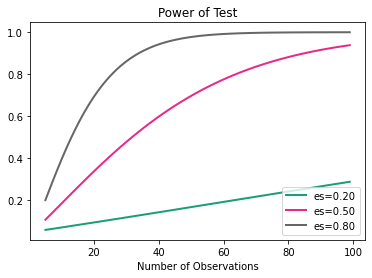

In [49]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot as plt
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis (if not specified, function will assume a default signficance of 0.5)
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

# If we are interested in a large effect (es = 0.80), a point of diminishing returns in terms of statistical power occurs at around 40-50 observations

Statsmodels has classes to perform a power analysis with other statistical tests, such as:
- F-test
- Z-test
- Chi-Squared test

# Extensions

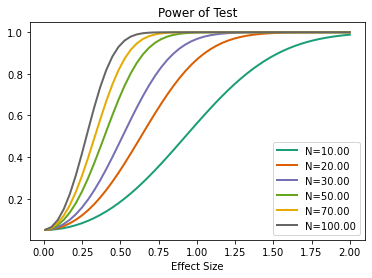

In [50]:
# calculate power curves for varying sample and effect size - opposite of previous plot
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis (if not specified, function will assume a default signficance of 0.5)
effect_sizes = np.linspace(0.01, 2, 51)
sample_sizes = np.array([10, 20, 30, 50, 70, 100])

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='es', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

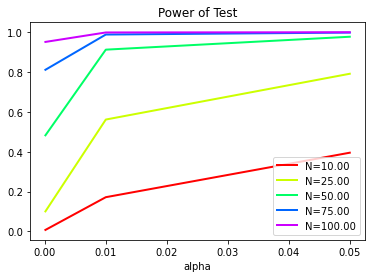

In [51]:
# plot the power curves of different standard significance levels for varying sample size
from numpy import array
from matplotlib import pyplot as plt
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis (if not specified, function will assume a default signficance of 0.5)
sig_levels = array([0.0001, 0.01, 0.05])
sample_sizes = array([10, 25, 50, 75, 100])

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='alpha', nobs=sample_sizes, alpha=sig_levels, effect_size=0.8)
plt.show()

In [52]:
# estimate sample size for f-test via power analysis
from statsmodels.stats.power import FTestAnovaPower

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = FTestAnovaPower()
result = analysis.solve_power(effect, power=power, nobs=None, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 14.462


In [53]:
# estimate sample size for z-test via power analysis
from statsmodels.stats.power import zt_ind_solve_power

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
result = zt_ind_solve_power(effect, power=power, nobs1=None, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 24.528


In [54]:
# estimate sample size for chi-squared test via power analysis
from statsmodels.stats.power import GofChisquarePower

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = GofChisquarePower()
result = analysis.solve_power(effect, power=power, nobs=None, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 12.264
